In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

* Basic Functions

In [3]:
def binomialModel(r,u,d,n,s0):
    p = (1+r-d)/(u-d)
    S = [s0 * (u/d)**np.arange(k+1) * d**k for k in range(n+1)]
    "Risk neutral Probability and Stocks"
    return S,p

def EuropeanPrice(S,p,r,n,phi):
    # Inputs are the stock values, risk neuatral probability "European Option Pricer, Binomial Model"
    # interest rate r, number of steps n
    # The function phi that gives the option payoff
    # V is going to be the price # Theta is going to be the hedges
    # Initializing V and Theta to zero
    V = [[0]*k for k in range(1,n+2)]
    Theta = [[0]*k for k in range(1,n+1)]
    # Pricing Equation
    V[-1] = phi(S[-1])
    # Terminal Condition
    for k in range(n-1,-1,-1):
        # fast way
        #V[k] = (1/(1+r)) * (p * V[k+1][1:] + (1-p) * V[k+1][:-1])
        # slower way
        for i in range(k+1):
            V[k][i] = (1/(1+r)) * (p * V[k+1][i+1] + (1-p) * V[k+1][i])
            Theta[k][i] = (V[k+1][i+1] - V[k+1][i])/(S[k+1][i+1] - S[k+1][i])
    return V[0][0], V, Theta
    # return the initial price, all prices V, all hedges Theta
    #V[k] = (1/(1+r)) * (p * V[k+1][1:] + (1-p) * V[k+1][:-1])
    #slower way
    for i in range(k+1):
    V[k][i] = (1/(1+r)) * (p * V[k+1][i+1] + (1-p) * V[k+1][i])
    Theta[k][i] = (V[k+1][i+1] - V[k+1][i])/(S[k+1][i+1] - S[k+1][i])
    # return the initial price, all prices V, all hedges Theta
    return V[0][0], V, Theta


* Put Example

In [4]:
# Model parameters
#s0, K, u, d, r, n = 4, 7, 2, 0.5, 0.5, 2
s0, K, sigma, r1, T, n = 50, 50, 0.2, 0.1, 1, 1000
u = np.exp(sigma*np.sqrt(T/n))
print(u)
d = 1/u
r = np.exp(r1*(T/n))-1
# Payoff function (put)
put = lambda s: np.maximum(K - s,0.)
# Binomial Tree and risk-neutral probability
Stock,pstar = binomialModel(r,u,d,n,s0)
# Price and hedges
v0,V,*_ = EuropeanPrice(Stock,pstar,r,n,put)
print("Risk-neutral up probability: %2.3f"%pstar)
print("Price: $%2.3f"%v0)


1.00634459755079
Risk-neutral up probability: 0.506
Price: $1.876


* Plotting the final value

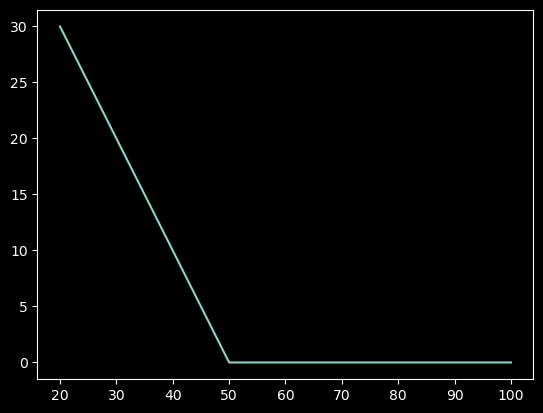

In [5]:
st = Stock[-1][:]
va = V[-1][:]
svals = np.linspace(20,100, 1000)
vinterp = np.interp(svals, st, va)
plt.plot(svals, vinterp, '-')
plt.show()


* Plotting vale at T/2

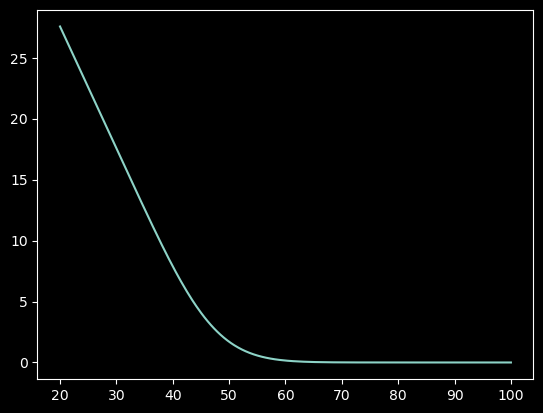

In [6]:
time = int(n/2)
st1 = Stock[time][:]
va1 = V[time][:]
svals1 = np.linspace(20,100, 1000)
vinterp1 = np.interp(svals1, st1, va1)
plt.plot(svals1, vinterp1, '-')
plt.show()


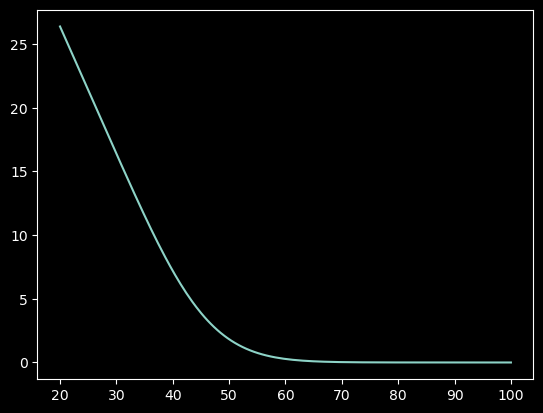

In [7]:
time4 = int(n/4)
st1 = Stock[time4][:]
va1 = V[time4][:]
svals1 = np.linspace(20,100, 1000)
vinterp1 = np.interp(svals1, st1, va1)
plt.plot(svals1, vinterp1, '-')
plt.show()